<h1>5장 차원 축소를 사용한 데이터 압축</h1>

In [2]:
from IPython.display import Image

<h2>주성분 분석을 통한 비지도 학습

-데이터셋을 이용하여 예측을 하는경우 데이터의 차원이 많을수록 데이터의 정확도가 떨어질수 있다
<br>-그러므로 특성을 추출합니다</br><br>-특성을 추출하여 차원의 문제를 감소시켜 정확도를 향상시킬수 있습니다</br>

<h3>주성분 분석을 통한 비지도 학습

비지도단계에서는 pca를 이용하여 차원을 축소합니다. pca는 특성간의 상관관계를 기반으로 하여 데이터의 패턴을 분석한다 pca는 분산이 가장큰 특징을 찾고 그다음 분산이 크고 1주성분과 직교인 주성분을 찾는다

pca는 데이터스케일에 민감해서 전처리 단계를 걸치고 해야합니다.
1.데이터 표준화
2.공분산 행렬 생성 3.공분산행렬을 벡터와 고윳값 분해합니다
4.고윳값을 내림차순으로 정렬 그에 해당하는 벡터를 순위맥깁니다.
5.고윳값이 큰 k의 고유벡터를 선택합니다. k는 특성부분공간의 차원입니다.
6.최상의k개의 고유 벡터로 투영행렬 w를 만듭니다
7.투영행렬 w사용하여 d차원 입력데이터셋x를 새로운차원k차원공간으로 변환

In [3]:
Image(url='https://git.io/JtsvW', width=400) 

<h3>주성분 분석을 통한 비지도 학습

In [4]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
from sklearn.model_selection import train_test_split
X=df_wine.iloc[:,1:].values
y=df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_Std=sc.transform(X_test)

### 공분산 행렬의 고윳값 분해

In [6]:
import numpy as np 
cov_mat=np.cov(X_train_std.T)
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)
print(eigen_vals)#고윳값

[4.61619945 2.71182346 1.48281669 0.92389573 0.81106565 0.66678321
 0.54336629 0.09045587 0.14872934 0.21340396 0.34269197 0.25110985
 0.30334959]


numpy.linalg.eig함수는 대칭과 비대칭을 다 다룰수있습니다. 비슷하게 에르미트 행렬을 분해하기위해 구현된.linalg.eigh함수는 공분산행렬과 같은 대칭헹랼을 다룰때 수치적으로 안정된결과를 제공합니다.

### 분산과 설명된 분산

In [7]:
tot=sum(eigen_vals)
var_exp=[(i/tot)for i in sorted(eigen_vals,reverse=True)]#분산의 비율을 구한뒤 비울이 큰순서로 정렬한다
cum_var_exp=np.cumsum(var_exp)#분포 누적
import matplotlib.pyplot as plt

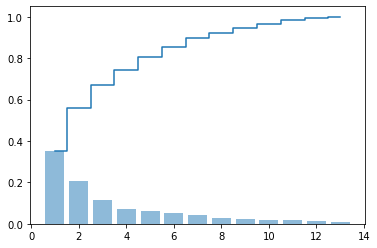

In [8]:
plt.bar(range(1,14),var_exp,alpha=0.5,align='center')
plt.step(range(1,14),cum_var_exp,where='mid')
#2개의 주성분들이 60퍼를 차지하고 있다

### 특성변환
1.교윳값이 가장 큰k개의 고유벡터를 선택한다 k는 새로운 특성 부분공간
2.최상위 k개의 고유벡터로 투영행렬w를 만듭니다
3.w를 사용하여 d차원의 입력데이터 셋X를 만듭니다.

In [9]:
# (고윳값, 고유벡터) 튜플의 리스트를 만듭니다
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# 높은 값에서 낮은 값으로 (고윳값, 고유벡터) 튜플을 정렬합니다
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print(w)

[[-0.14709768  0.45696853]
 [ 0.23612964  0.25732429]
 [-0.01348789  0.3236074 ]
 [ 0.23467194  0.00677984]
 [-0.10501103  0.34830692]
 [-0.39757797  0.06416748]
 [-0.44078506 -0.00500834]
 [ 0.29746824  0.04047413]
 [-0.32961253  0.08148443]
 [ 0.07410328  0.50342298]
 [-0.2866998  -0.29053742]
 [-0.37299476 -0.16566909]
 [-0.28287851  0.34808791]]


노트:

사용하는 Numpy와 LAPACK 버전에 따라 행렬 W의 부호가 바뀔 수 있습니다. 이는 문제가 아닙니다. v가 행렬 Σ의 고유벡터라면 다음을 얻을 수 있습니다.

Σv=λv,
여기에서 λ는 고윳값입니다.

Σ⋅(−v)=−Σv=−λv=λ⋅(−v).
이기 때문에 −v도 동일한 고윳값을 가진 고유벡터입니다

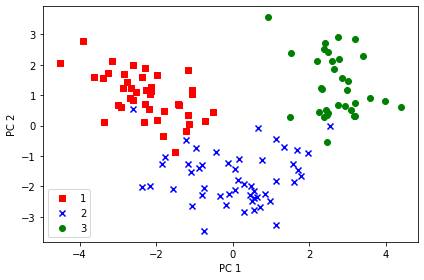

In [10]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

### 사이킷런의 주성분 분석

In [11]:
from sklearn.decomposition import PCA
pca=PCA()
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_Std)

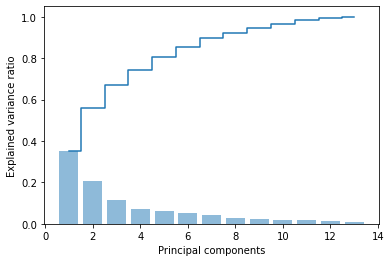

In [12]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 준비합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스별로 샘플을 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor=None if idx==1 else 'black',
                    marker=markers[idx], 
                    label=cl)

In [14]:
from sklearn.linear_model import LogisticRegression
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_Std)
lr=LogisticRegression(random_state=1)
lr=lr.fit(X_train_pca,y_train)

Text(0, 0.5, 'PC 2')

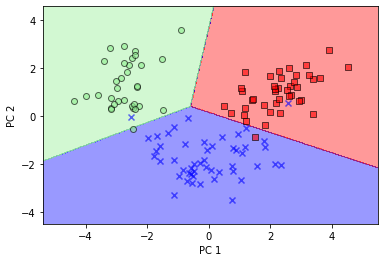

In [15]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [16]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_#분산의 비율을 나타낸다 계산없이 분산비율 확인하여 주성분을 선택할수 있다

array([0.35222862, 0.20691953, 0.11314296, 0.07049577, 0.06188652,
       0.05087738, 0.04146033, 0.02614833, 0.0231464 , 0.01916037,
       0.0162833 , 0.01134845, 0.00690203])

In [17]:
pca = PCA(n_components=0.95)#95프로 까지 설명하는 주성분의 비율을 나타낸다
pca.fit(X_train_std)
print('주성분 개수:', pca.n_components_)
print('설명된 분산 비율:', np.sum(pca.explained_variance_ratio_))

주성분 개수: 10
설명된 분산 비율: 0.965466210516188


In [18]:
pca = PCA(n_components='mle')#토마스민카의 차원선택방식을 사용한다
pca.fit(X_train_std)
print('주성분 개수:', pca.n_components_)
print('설명된 분산 비율:', np.sum(pca.explained_variance_ratio_))

주성분 개수: 7
설명된 분산 비율: 0.8970111100041168


PCA의 가장 큰 제약 사항 중 하나는 배치로만 실행되기 때문에 대용량 데이터셋을 처리하려면 많은 메모리가 필요합니다. IncrementalPCA를 사용하면 데이터셋의 일부를 사용하여 반복적으로 훈련할 수 있습니다.

In [19]:
#호출
from sklearn.decomposition import IncrementalPCA
ipca=IncrementalPCA(n_components=9)
for batch in range(len(X_train_std)//25+1):
    X_batch=X_train_std[batch*25:(batch+1)*25]
    ipca.partial_fit(X_batch)
print('주성분 개수:',ipca.n_components_)

주성분 개수: 9


## 선형 판별 분석을 통한 지도방식의 데이터 압축

In [20]:
Image(url='https://git.io/Jtsv8', width=400) 


선형판별분석은 규제가 없는 모델에서 차원의 저주로 과대적합 줄이고 계산 효율성 높이는것이다 LDA는 클래스를 최적으로 구분할수있는 특성부분공간을 찾는것입니다
    LDA는 지도 학습에서 사용되는 특성추출기법입니다.
<br>d차원의 데이터셋을 표준화 처리합니다 
<br>각 클래스에 대해 d차원의 평균벡터 계산
<br>클래스간의 산포행렬 계산 클래스내의 산포행렬 계산
<br>S−1WSB 행렬의 고윳값
<br>고윳값을 내림차순 정렬
<br>고윳값이 가장 큰 k개의 고유 벡터 선택
<br>고유 벡터로 만든 변환 행렬로 데이터셋 투영


산포행렬계산

In [21]:
np.set_printoptions(precision=4)
mean_vecs=[]
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis=0))
    print(label,mean_vecs[label-1])

1 [ 0.8921 -0.2084  0.3591 -0.7063  0.5091  0.8614  0.9955 -0.5628  0.6079
  0.2138  0.4252  0.7239  1.1657]
2 [-0.9034 -0.4368 -0.4571  0.2031 -0.4555 -0.0827  0.0211 -0.0105 -0.0139
 -0.8345  0.4595  0.2733 -0.737 ]
3 [ 0.2605  0.9208  0.2464  0.5698  0.0575 -0.9449 -1.2688  0.7152 -0.7342
  0.9987 -1.2244 -1.3134 -0.3316]


<br>SW=∑ci=1Si
<br>Si=∑x∈Di(x−mi)T(x−mi)

In [22]:
d=13
S_W=np.zeros((d,d))#13,13 특성의 크기만큼 d*d행렬 생성
for label , mv in zip(range(1,4),mean_vecs):
    class_scatter=np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row,mv=row.reshape(d,1),mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W+=class_scatter

In [23]:
#클래스가 균일하게 분포하지 않았으면 공분산 행렬을 사용하는것이 좋습니다
print(np.bincount(y_train)[1:])

[41 50 33]


In [24]:
d = 13  # 특성의 수
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('스케일 조정된 클래스 내의 산포 행렬: %sx%s' % 
      (S_W.shape[0], S_W.shape[1]))

스케일 조정된 클래스 내의 산포 행렬: 13x13


SB=∑ci=1ni(mi−m)T(mi−m)
<br>클래스간의 산포행렬 mi=는 클래스의 평균 m=전체평균

In [25]:
mean_overall = np.mean(X_train_std, axis=0)#전체평균
mean_overall = mean_overall.reshape(d, 1) #열벡터로 치환
d = 13  # 특성 개수
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # 열 벡터로 만들기
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('클래스 간의 산포 행렬: %sx%s' % (S_B.shape[0], S_B.shape[1]))

클래스 간의 산포 행렬: 13x13


### 선형 판별 벡터 선택하기

행렬 S−1WSB의 일반적인 고윳값 분해 문제를 풉니다

In [26]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [27]:
# (고윳값, 고유벡터) 튜플의 리스트를 만듭니다.
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# (고윳값, 고유벡터) 튜플을 큰 값에서 작은 값 순서대로 정렬합니다.
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# 고윳값의 역순으로 올바르게 정렬되었는지 확인합니다.
print('내림차순의 고윳값:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

내림차순의 고윳값:

397.77467466425543
189.9675056770115
3.960032256358572e-14
2.842170943040401e-14
2.560107438649614e-14
2.2423535280209857e-14
2.2423535280209857e-14
1.5275176875930156e-14
1.5275176875930156e-14
1.0227655328228867e-14
1.0227655328228867e-14
2.187362087419188e-15
5.298146642119492e-17


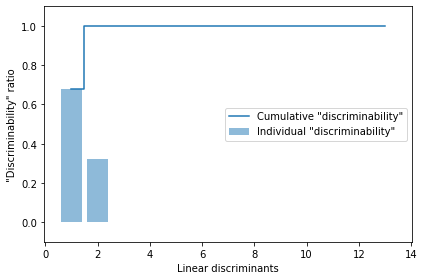

In [28]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='Individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_07.png', dpi=300)
plt.show()

In [29]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))#.real복소수형 반환
print('행렬 W:\n', w)#첫번째두번째의 벡터를 이용하여


행렬 W:
 [[-0.0559 -0.495 ]
 [ 0.0593 -0.2131]
 [-0.0598 -0.4124]
 [ 0.1822  0.3224]
 [-0.018   0.0373]
 [ 0.2111 -0.0069]
 [-0.7913  0.1473]
 [-0.1054  0.0731]
 [ 0.0633  0.1507]
 [ 0.2379 -0.1754]
 [-0.0635  0.2775]
 [-0.3216  0.1129]
 [-0.3261 -0.5136]]


### 사이킷런의 LDA

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

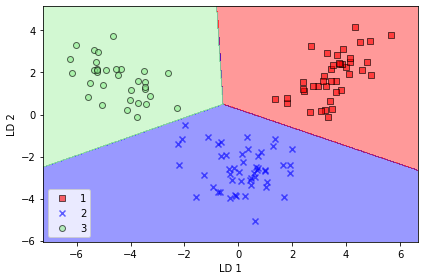

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

## kernelPCA

많은 머신러닝 알고리즘은 입력데이터가 선형적으로 구분이 가능하다는 가정을 합니다
현재의 많은 데이터는 선형적으로 구분을 할수 없습니다. 그로안해 비선형 문제를 다루기위해 커널화 pca를 사용하여 차원축소하여 
계산합니다

### 커널함수 커널트릭

비선형 뮨제를 해결하기 위해 클래스가 선형적으로 구분되는 새로운 고차원 특성 공간으로 구분되는 새로운 고차원공간으로 투영할수있습니다


1.커널유사도 행렬 k를 다음 식으로 계산
2.커널행렬k를 중앙에 정렬
3.투영된 샘플 확인


In [43]:
#구현 
from scipy.spatial.distance import pdist,squareform
from numpy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X,gamma,n_components):
    """RBF 커널
    x:넘파이{ndarray} shape=[n_samples,n_features]
    gamma:float 튜닝 매개변수
    n_components: w주성분개수"""
    
    #데이터셋에서 샘플간 유클라디안 거리 확인
    sq_dists=pdist(X,'sqeuclidean')
    #샘플간의 거리를 정방대칭
    mat_sq_dist=squareform(sq_dists)
    #커널 행렬을 계산
    K=exp(-gamma*mat_sq_dist)
    #커널 행렬을 중앙에 정렬
    N=K.shape[0]
    one_n=np.ones((N,N))/N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # 중앙에 맞춰진 커널 행렬의 고윳값과 고유벡터를 구합니다.
    # scipy.linalg.eigh 함수는 오름차순으로 반환합니다.
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    #최상의k개의 고유벡터 선택
    X_pc=np.column_stack([eigvecs[:,i]for i in range(n_components)])
    return X_pc

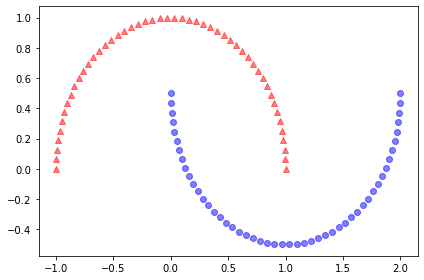

In [36]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_12.png', dpi=300)
plt.show()

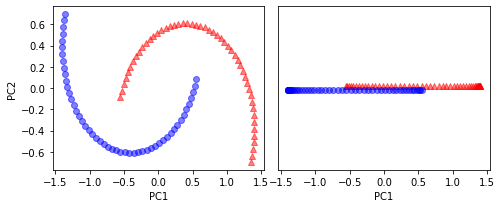

In [37]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_13.png', dpi=300)
plt.show()

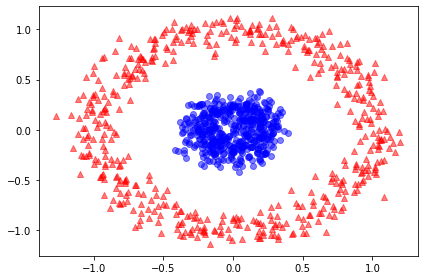

In [38]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_15.png', dpi=300)
plt.show()

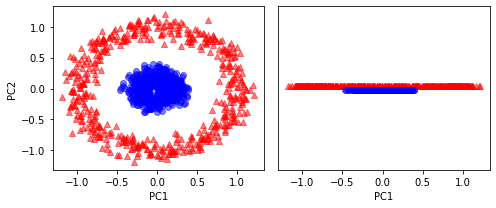

In [39]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_16.png', dpi=300)
plt.show()

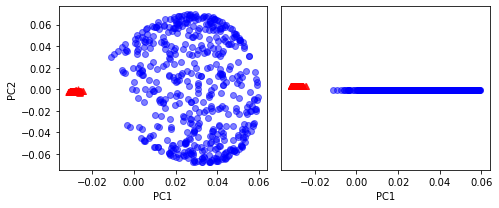

In [44]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_17.png', dpi=300)
plt.show()

### 새로운 데이터 투영

훈련데이터셋에 퍼힘되지 않았던 새로운 데이터 포인트를 투영하는방법

In [45]:
from scipy.spatial.distance import pdist, squareform
from numpy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X,gamma,n_components):
    """return
    alpha:넘파이 shpae=[n_samples,k_features]
    lambdas:list"""
    sq_dists=pdist(X,'sqeuclidean')
    mat_sq_dists=squareform(sq_dists)
    K=exp(-gamma*mat_sq_dists)
    N=K.shape[0]
    one_n=np.ones((N,N))/N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    #최상위 k개의 고유벡터를 선택합니다
    alphas = np.column_stack([eigvecs[:, i]
                              for i in range(n_components)])
    #고윳값 선택
    lambdas=[eigvals[i] for i in range(n_components)]
    
    return alphas,lambdas
    

In [46]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

In [47]:
x_new = X[25]
x_new

array([1.8713, 0.0093])

In [48]:
x_proj = alphas[25] # 원본 투영
x_proj

array([0.0788])

In [50]:
def project_x(x_new,X,gamma,alphas,lambdas):
    pair_dist=np.array([np.sum((x_new-row)**2) for row in X])
    k=np.exp(-gamma*pair_dist)
    return k.dot(alphas/lambdas)
x_reproj=project_x(x_new,X,gamma=15,alphas=alphas,lambdas=lambdas)
x_reproj

array([0.0788])

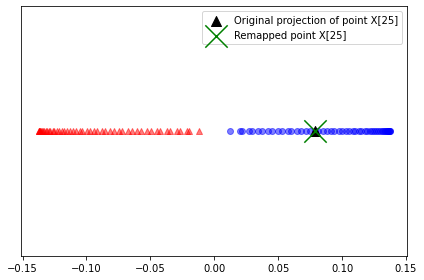

In [51]:
plt.scatter(alphas[y == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
            label='Original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
            label='Remapped point X[25]', marker='x', s=500)
plt.yticks([], [])
plt.legend(scatterpoints=1)

plt.tight_layout()
# plt.savefig('images/05_18.png', dpi=300)
plt.show()

### 사이킷런 커널 pca

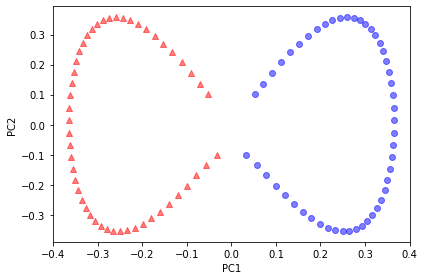

In [53]:
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)
plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
# plt.savefig('images/05_19.png', dpi=300)
plt.show()

(Locally Linear Embedding)은 이웃한 샘플 간의 거리를 유지하는 저차원 투영을 찾습니다. 지역 선형 임베딩을 구현한 사이킷런의 LocallyLinearEmbedding 클래스를 앞에서 적재한 반달 모양 데이터셋에 적용해 보겠습니다. 

In [54]:
from sklearn.manifold import LocallyLinearEmbedding
lle=LocallyLinearEmbedding(n_components=2,random_state=1)
X_lle=lle.fit_transform(X)

t-sne는 데이터 포인트간의 유사도를 결합확률로 변환,저차원과 고차원의 확률사이에는 쿨백-라이블러발산 최소화합니다

In [56]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=1)
x_tsne=tsne.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
